### Load data

In [1]:
import pandas as pd
import numpy as np
import pickle
import joblib
import shap
import matplotlib.pyplot as plt
import seaborn as sns


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
#Load rf model
with open('/model/rf_model.pkl','rb') as f:
    rf_model = joblib.load(f)

In [3]:
#Load dataset
with open('/preprocessing/processed_data.pickle','rb') as f:
    preproc_data = pickle.load(f)

In [4]:
cytokine_df = preproc_data['cytokine_data']
patient_meta = preproc_data['metadata'] 
patient_info = preproc_data['clinical'] 

### Model evaluation

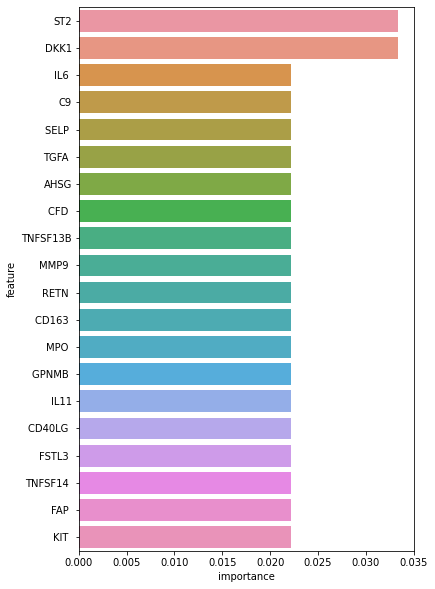

In [5]:
# Get feature importances
importances = rf_model.feature_importances_
feature_names = cytokine_df.columns
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort the feature importances in descending order and select the top 20
top_20_features = feature_importances.sort_values(by='importance', ascending=False).head(20)

# Plot the top 20 feature importances
plt.figure(figsize=(6, 10))
sns.barplot(x='importance', y='feature', data=top_20_features)
plt.show()


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


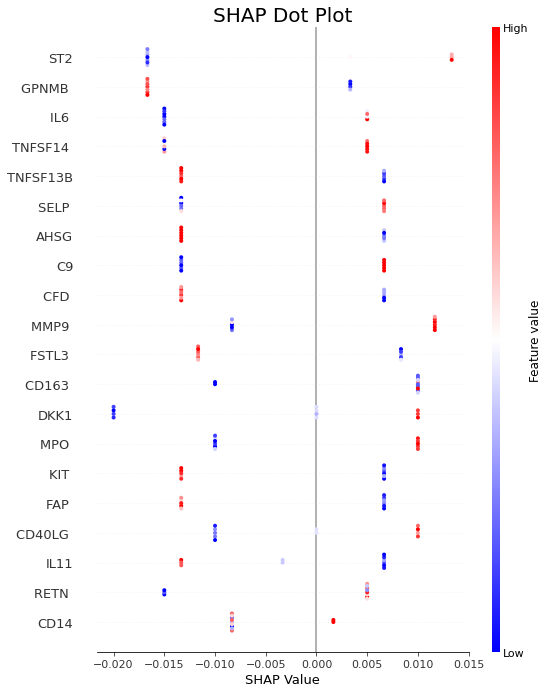

In [6]:
tree_explainer = shap.TreeExplainer(rf_model) ## TreeExplainer
shap_values = tree_explainer.shap_values(cytokine_df) ## SHAP Value
 
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()
#Plot SHAP as sever probability
shap.summary_plot(shap_values[1], cytokine_df, 
                  cmap='bwr', 
                  show=False, 
                 plot_type='dot')
ax.set_xlabel('SHAP Value')
ax.set_title('SHAP Dot Plot', fontsize=20)
plt.show()

In [7]:
shap_df = pd.DataFrame(shap_values[1],columns = cytokine_df.columns)
shap_df.index = cytokine_df.index
shap_df

,CXCL9,LIF,CXCL11,IL25,IL12B,IL10,IL13,IL11,IL15,PTX3,...,FURIN,FSTL3,FLT3LG,FAP,FABP4,F3,ESM1,ERBB3,ENPP2,WFDC2
Healthy1,0.0,0.001667,0.0,0.0,-0.008333,0.0,0.0,-0.003333,0.0,0.0,...,0.0,-0.011667,-0.005,-0.013333,0.0,-0.006667,0.0,0.0,0.0,-0.005
Healthy2,0.0,-0.008333,0.0,0.0,0.001667,0.0,0.0,-0.013333,0.0,0.0,...,0.0,-0.011667,-0.005,-0.013333,0.0,-0.006667,0.0,0.0,0.0,-0.005
Patient1_1,0.0,0.001667,0.0,0.0,0.001667,0.0,0.0,-0.013333,0.0,0.0,...,0.0,-0.011667,-0.005,-0.013333,0.0,-0.006667,0.0,0.0,0.0,-0.005
Patient1_2,0.0,0.001667,0.0,0.0,0.001667,0.0,0.0,-0.013333,0.0,0.0,...,0.0,-0.011667,0.005,-0.013333,0.0,-0.006667,0.0,0.0,0.0,-0.005
Patient1_5,0.0,-0.008333,0.0,0.0,0.001667,0.0,0.0,-0.003333,0.0,0.0,...,0.0,-0.011667,-0.005,-0.013333,0.0,-0.006667,0.0,0.0,0.0,-0.005
Patient1_6,0.0,-0.008333,0.0,0.0,0.001667,0.0,0.0,0.006667,0.0,0.0,...,0.0,-0.011667,-0.005,0.006667,0.0,0.003333,0.0,0.0,0.0,-0.005
Patient2_1,0.0,0.001667,0.0,0.0,0.001667,0.0,0.0,0.006667,0.0,0.0,...,0.0,0.008333,0.005,0.006667,0.0,0.003333,0.0,0.0,0.0,0.005
Patient2_2,0.0,0.001667,0.0,0.0,0.001667,0.0,0.0,0.006667,0.0,0.0,...,0.0,0.008333,0.005,0.006667,0.0,0.003333,0.0,0.0,0.0,0.005
Patient2_3,0.0,0.001667,0.0,0.0,0.001667,0.0,0.0,0.006667,0.0,0.0,...,0.0,0.008333,0.005,0.006667,0.0,-0.006667,0.0,0.0,0.0,0.005
Patient2_4,0.0,0.001667,0.0,0.0,0.001667,0.0,0.0,0.006667,0.0,0.0,...,0.0,0.008333,0.005,0.006667,0.0,0.003333,0.0,0.0,0.0,0.005


In [8]:
import umap.umap_ as umap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

reducer = umap.UMAP()
embedding = reducer.fit_transform(shap_df)

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1


No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


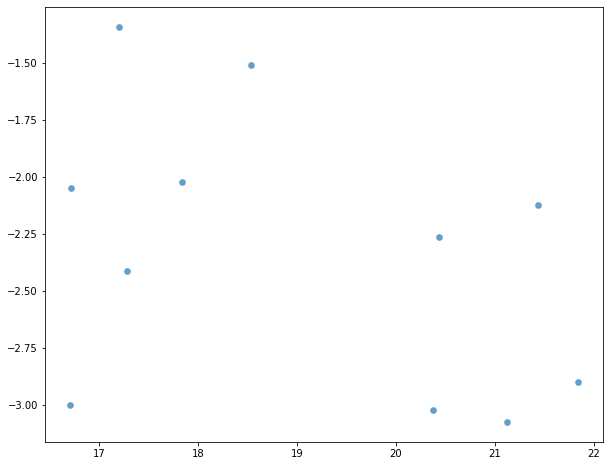

In [9]:
import matplotlib.pyplot as plt

# Extract UMAP coordinates and labels
umap_x = embedding[:, 0]
umap_y = embedding[:, 1]

# Create scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(umap_x, umap_y, cmap="bwr", s=50, alpha=0.7, edgecolors="w", linewidth=0.5)

In [10]:
from sklearn.cluster import DBSCAN

# Initialize DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=3) # partial data is too small to set min_sample=20.

# Fit to UMAP data and get cluster labels
clusters = dbscan.fit_predict(embedding)


In [11]:
embedding, clusters

(array([[16.714314 , -2.0475426],
        [17.279623 , -2.4140635],
        [16.705837 , -3.002305 ],
        [17.19955  , -1.342096 ],
        [17.838465 , -2.021136 ],
        [18.537838 , -1.5079662],
        [21.44188  , -2.1259143],
        [21.123413 , -3.075382 ],
        [20.373632 , -3.0233152],
        [21.83852  , -2.899527 ],
        [20.435349 , -2.2629123]], dtype=float32),
 array([ 0,  0, -1, -1,  0, -1, -1,  1,  1,  1,  1]))

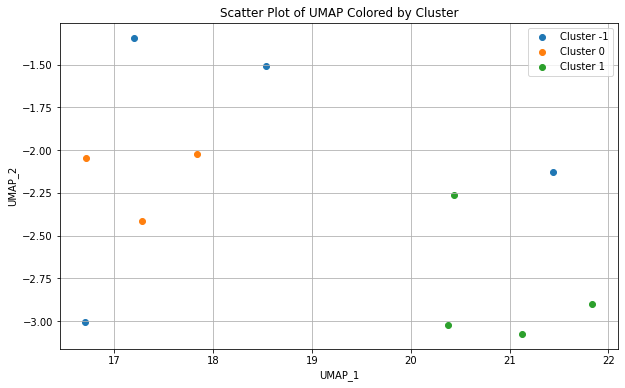

In [12]:
plt.figure(figsize=(10, 6))
unique_clusters = np.unique(clusters)

for cluster in unique_clusters:
    idx = clusters == cluster
    plt.scatter(embedding[idx, 0], embedding[idx, 1], label=f'Cluster {cluster}')

plt.title('Scatter Plot of UMAP Colored by Cluster')
plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.legend()
plt.grid(True)
plt.show()

### Update data

In [13]:
analyzed_data = {}
analyzed_data['shap_value'] = shap_df
analyzed_data['umap'] = embedding
analyzed_data['cluster'] = clusters

In [14]:
with open('/analysis/analyzed_data.pickle','wb') as f:
    pickle.dump(analyzed_data,f)